In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]


In [0]:
# !dw configure

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw


In [0]:
#drive.mount("/content/drive")

In [6]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [13]:
ls

data/              LICENSE               matrix_day2_done.png  README.md
HelloGithub.ipynb  matrix_day1_done.png  matrix_one/           women/


In [0]:
!echo 'women' > .gitignore

In [0]:
!git add .gitignore

In [0]:
women = dw.load_dataset('datafiniti/womens-shoe-prices')

In [17]:
women.dataframes

LazyLoadedDict({'7003_1': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes': LazyLoadedValue(<pandas.DataFrame>), 'datafiniti_womens_shoes_jun19': LazyLoadedValue(<pandas.DataFrame>)})

In [18]:
df = women.dataframes['7003_1']
df.shape

(19045, 47)

In [0]:
ls women

In [20]:
ls matrix_one/

day3.ipynb


In [87]:
df.sample(3)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,websiteids,weight
5138,AVpe_lxpLJeJML430ApO,NaN,Style & Co.,"Shoes,Women's Shoes,Clothing,All Women's Shoes",NaN,NaN,2017-01-12 19:06:59,2017-01-12 19:06:59,"[{""dateSeen"":[""2017-01-12T19:06:59Z""],""sourceU...",NaN,6.362020e+11,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",NaN,https://i5.walmartimages.com/asr/4a7eb533-f3bc...,NaN,"636202263655,0636202263655,style/ceejayblk",Style & Co,CEEJAY-BLK,"[{""dateSeen"":[""2017-01-12T19:06:59Z""],""name"":""...",Style & Co Ceejay Open Toe Synthetic Sandals,12.99,12.99,NaN,NaN,new,NaN,USD,2017-01-12T19:06:59Z,2016-10-05T00:00:00Z,NaT,TRUE,ApparelSave - Walmart.com,CLEARANCE USD 56.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Style-Co-Ceejay-Wom...,NaN,NaN,NaN,"8.5,10,7,9.5,5,6.5,7.5,9,8,11",NaN,https://www.walmart.com/ip/Style-Co-Ceejay-Wom...,6.36202E+11,NaN,NaN
10721,AVpe7bgV1cnluZ0-aCz4,NaN,Lucky Brand,"Clothing,Shoes,Women's Shoes,All Women's Shoes",Gray,NaN,2016-11-07 19:00:39,2016-11-07 19:00:39,"[{""dateSeen"":[""2016-11-07T19:00:39Z""],""sourceU...",NaN,8.884500e+11,"[{""key"":""Heel Height"",""value"":[""Flat (0 to 1/2...",NaN,https://i5.walmartimages.com/asr/55de9719-cc8e...,NaN,"888450079988,0888450079988,luckybrand/parkerrbrd",Lucky Brand,PARKERR-BRD,"[{""dateSeen"":[""2016-11-07T19:00:39Z""],""name"":""...",Lucky Brand Parkerr Round Toe Leather Loafer,24.99,24.99,NaN,NaN,NaN,NaN,USD,2016-11-07T19:00:39Z,2016-11-06T00:00:00Z,NaT,TRUE,NaN,CLEARANCE USD 54.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Lucky-Brand-Parkerr...,NaN,NaN,NaN,6.5,NaN,https://www.walmart.com/ip/Lucky-Brand-Parkerr...,8.8845E+11,NaN,NaN
13082,AVpfOx7E1cnluZ0-gr06,NaN,Allegra K,"Shoes,Clothing,Women's Shoes,All Women's Shoes",NaN,NaN,2016-05-17 20:05:53,2016-05-17 23:35:31,NaN,NaN,7.008370e+11,"[{""key"":""Material"",""value"":[""Faux Leather,Canv...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-23dc/...,NaN,"7,008,369,471,890,700,000,000,000",NaN,NaN,"[{""dateSeen"":[""2016-05-17T20:05:53Z""],""name"":""...",Red White Faux Leather Split Sole Canvas Balle...,9.94,9.94,NaN,NaN,new,NaN,USD,2016-05-17T20:05:53Z,2016-05-17T00:00:00Z,NaT,TRUE,Tasharina Corp - Walmart.com,REDUCED USD 10.05,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Red-White-Faux-Leath...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Red-White-Faux-Leath...,7.00837E+11,NaN,NaN


In [23]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [91]:
df.brand.unique()

array(['Zoot', 'Wild Pair', 'Sutton Studio', ..., 'Miss Selfridge',
       '3dRose', 'NIXON'], dtype=object)

In [25]:
df.prices_currency.unique()


array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

In [26]:
df.prices_currency.value_counts()

USD                               18199
CAD                                 638
AUD                                 118
EUR                                  64
GBP                                  15
new                                   1
Off Price Direct - Walmart.com        1
Name: prices_currency, dtype: int64

In [27]:
df.prices_currency.value_counts(normalize=True)

USD                               0.956031
CAD                               0.033515
AUD                               0.006199
EUR                               0.003362
GBP                               0.000788
new                               0.000053
Off Price Direct - Walmart.com    0.000053
Name: prices_currency, dtype: float64

In [103]:
df_cad = df[ df.prices_currency == 'CAD'].copy()
df_cad.shape

(638, 47)

In [104]:
df_cad.prices_amountmax.head()

42         88
117    154.22
128        88
142     57.32
161    106.54
Name: prices_amountmax, dtype: object

In [0]:
df_cad['prices_amountmin'] = df_cad.prices_amountmin.astype(np.float)

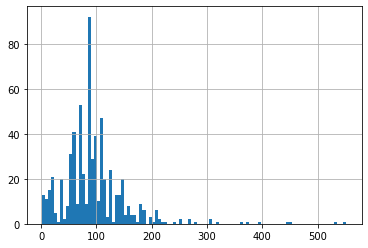

In [109]:
df_cad['prices_amountmin'].hist(bins=100)

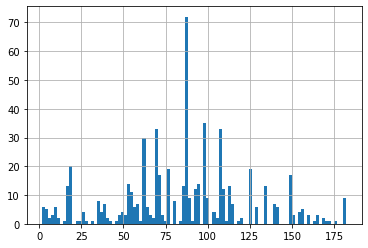

In [117]:
filter_max = np.percentile( df_cad['prices_amountmin'], 95)
df_cad_filter = df_cad[ df_cad['prices_amountmin'] < filter_max ]
df_cad_filter['prices_amountmin'].hist(bins=100)

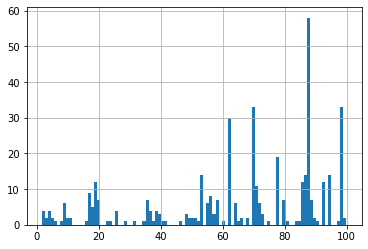

In [118]:
df_cad_filter = df_cad[ df_cad['prices_amountmin'] < 100 ]
df_cad_filter['prices_amountmin'].hist(bins=100)

In [120]:
!git add women/Womens_shoes.ipynb

The following paths are ignored by one of your .gitignore files:
women/Womens_shoes.ipynb
Use -f if you really want to add them.
